# Fraud Detection Project

## Collaboration Plan
**Participants:** Ryan Tang and Santiago von Straussburg

**Github Page**: https://ryantangmj.github.io

### Overview
We are collaboratively analyzing two fraud datasets to explore fraud patterns, feature importance, and machine learning model evaluation.

- **First dataset:** `Cargo_fraud_only.csv`, obtained from [UCR Database](https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/downloads)
- **Second dataset:** Twelve-month and one-month arrest data for fraud, obtained from [UCR Database](https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/downloads)
- **Third dataset:** Yearly unemployment index by State, obtained from [BLS Database](https://data.bls.gov/lausmap/showMap.jsp)


### Technologies Used
1. **GitHub Repository**: For version control, code collaboration, and final project hosting.
2. **Google Colab/Jupyter Notebooks**: For ETL, EDA, and model development.
3. **Discord**: Primary communication platform for real-time discussions.
   - Weekly meetings at 08:00 PM CST on Thursdays for progress reviews and planning.

### Current Focus
Both team members are currently working together on data exploration, including Extraction, Transformation, and Load (ETL) processes, as well as Exploratory Data Analysis (EDA).

### Roadmap & Milestones
#### Milestone 1 – Initial Dataset Selection & ETL
- Identify datasets. - **Completed**
- Perform initial ETL on datasets. - **Completed**
- Establish a GitHub repository and GitHub Pages site. - **Completed**
- Develop basic statistics and initial graph for dataset understanding. - **Completed**

#### Milestone 2 – Additional ETL & Exploratory Data Analysis
- Continue data cleaning and transformation. - **Completed**
- Conduct comprehensive EDA with 3-5 key graphs. - **Completed**
- Present the first project pitch with initial findings. - **Completed**

#### Deliverable 1 – In-Class Presentation
- Finalize and present a 5-7 slide deck covering problem statement, ETL, EDA, and project progress. - **Completed**

#### Milestone 3 – Model Development & Evaluation
- Select machine learning models (Random Forest, XGBoost, Logistic Regression).
- Begin model training and evaluation.
- Analyze model performance and feature importance.

#### Deliverable 2 – Final Website & Presentation
- Finalize project with the deployment of results to the GitHub Pages site.
- Prepare the final presentation summarizing the project lifecycle.

---

## Project Goals

The goal of this collaborative project is to analyze fraud patterns, identify significant features contributing to fraud, and evaluate various machine learning models for fraud detection. By leveraging two distinct datasets, we aim to develop a deep understanding of fraudulent behavior and build predictive models that will aid in identifying and mitigating fraud across different sectors. Specifically, our objectives are as follows:

### 1. Fraud Pattern Analysis
- **Objective:** Investigate patterns and trends in fraud activities across different sectors, particularly cargo-related fraud and arrest data for fraud cases. This will involve examining how fraudulent activities vary over time and geographic locations, and identifying key factors that influence fraud prevalence.

### 2. Feature Importance Assessment
- **Objective:** Analyze and rank the importance of different features contributing to fraud detection. By evaluating features such as transaction details, timestamps, geographic data, and socio-economic indicators, we aim to pinpoint the key variables that can most accurately predict fraud occurrences.

### 3. Machine Learning Model Development & Evaluation
- **Objective:** Develop and compare multiple machine learning models (Random Forest, XGBoost, Logistic Regression) to identify the most effective model for predicting fraud cases. The models will be evaluated on their performance using metrics such as accuracy, precision, recall, and F1-score to ensure robust fraud detection capabilities.

### 4. Comprehensive Data Analysis
- **Objective:** Through thorough data exploration and analysis, we aim to create a holistic view of fraud activities, utilizing exploratory data analysis (EDA) techniques. This will include visualizing fraud trends, uncovering hidden relationships, and establishing baseline statistics.

### 5. Actionable Insights & Final Presentation
- **Objective:** By the end of the project, we aim to deliver a comprehensive set of insights that can inform decision-making regarding fraud prevention and detection strategies. These findings will be shared through a final presentation and a dedicated project website hosted via GitHub Pages.


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from scipy.stats import linregress
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


In [28]:
# Load the cargo fraud data
cargo_fraud = pd.read_csv('cargo_fraud_only.csv')

# Check if 'data_year' column exists
if 'data_year' in cargo_fraud.columns:
    # Use 'data_year' as 'Year'
    cargo_fraud['Year'] = cargo_fraud['data_year'].astype(int)
else:
    # Extract 'Year' from 'date_recovered' or another date column
    cargo_fraud['date_recovered'] = pd.to_datetime(cargo_fraud['date_recovered'], errors='coerce')
    cargo_fraud['Year'] = cargo_fraud['date_recovered'].dt.year
    cargo_fraud = cargo_fraud.dropna(subset=['Year'])
    cargo_fraud['Year'] = cargo_fraud['Year'].astype(int)

# Ensure the 'State' column exists and matches the 'State' in 'state_unemployment'
if 'state_name' in cargo_fraud.columns:
    cargo_fraud['State'] = cargo_fraud['state_name']
else:
    # Map state abbreviations to full state names
    state_abbrev_to_name = {
        'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
        'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
        'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
        'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
        'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
        'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
        'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
        'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
        'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
        'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
        'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
        'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
        'WI': 'Wisconsin', 'WY': 'Wyoming'
    }
    cargo_fraud['State'] = cargo_fraud['state_abbr'].map(state_abbrev_to_name)

# Exclude rows with missing 'State' or 'Year'
cargo_fraud = cargo_fraud.dropna(subset=['State', 'Year'])

# Exclude Puerto Rico and other territories
cargo_fraud = cargo_fraud[~cargo_fraud['State'].isin(exclude_states)]

# Display the processed cargo fraud data
print(cargo_fraud[['State', 'Year']].head())



     State  Year
0  Florida  2012
1  Florida  2012
2  Florida  2012
3  Florida  2012
4  Florida  2012


In [4]:
# Load arrest data
arrest_data_url = "https://raw.githubusercontent.com/ryantangmj/ryantangmj.github.io/main/fraud_onemonth_data.csv"
arrest_data = pd.read_csv(arrest_data_url, index_col=0)
arrest_data.reset_index(drop=True, inplace=True)

# Display the first few rows
arrest_data.head()


,State Code,ORI Code,Group,Division,Year,MSA,Offense Code,Male Under 10,Male 10-12,Male 13-14,...,Juvenile White,Juvenile Black,Juvenile Indian,Juvenile Asian,Juvenile Hispanic,Adult White,Adult Black,Adult Indian,Adult Asian,Adult Hispanic
0,50,AK00101,1C,9.0,22,38.0,110,0,0.0,1.0,...,2.0,4.0,1.0,0.0,0.0,33.0,16.0,14.0,6.0,0.0
1,50,AK00102,4,9.0,22,58.0,110,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,4.0,0.0,0.0
2,50,AK00103,4,9.0,22,0.0,110,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0
3,50,AK00104,6,9.0,22,0.0,110,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,50,AK00108,6,9.0,22,0.0,110,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [7]:
# Load HPI data
hpi_data_url = "https://raw.githubusercontent.com/ryantangmj/ryantangmj.github.io/main/hpi_by_state.csv"
hpi_data = pd.read_csv(hpi_data_url)

# Keep relevant columns
hpi_data = hpi_data[["State", "Year", "HPI"]]

# Filter years between 2012 and 2022
hpi_data = hpi_data[(hpi_data["Year"] >= 2012) & (hpi_data["Year"] <= 2022)].reset_index(drop=True)

# Display the first few rows
hpi_data.head()


,State,Year,HPI
0,Alabama,2012,341.58
1,Alabama,2013,339.66
2,Alabama,2014,344.12
3,Alabama,2015,352.11
4,Alabama,2016,361.39


In [9]:
# Load poverty data
poverty_data_url = "https://raw.githubusercontent.com/ryantangmj/ryantangmj.github.io/main/poverty_data.csv"
poverty_data = pd.read_csv(poverty_data_url)

# Display the first few rows
poverty_data.head()


,State,Total population 2022,Number in poverty 2022,Percentage poverty 2022,Total population 2021,Number in poverty 2021,Percentage poverty 2021,Total population 2020,Number in poverty 2020,Percentage poverty 2020,...,Percentage poverty 2015,Total population 2014,Number in poverty 2014,Percentage poverty 2014,Total population 2013,Number in poverty 2013,Percentage poverty 2013,Total population 2012,Number in poverty 2012,Percentage poverty 2012
0,Alabama,"4,990",681,13.6,"4,961",787,15.9,"5,001",744,14.9,...,16.3,"4,765",848,17.8,"4,807",891,18.5,"4,808",777,16.2
1,Alaska,708,68,9.6,712,81,11.4,708,95,13.4,...,9.2,694,82,11.8,696,67,9.6,702,70,10.0
2,Arizona,"7,239",920,12.7,"7,303",922,12.6,"7,203",783,10.9,...,17.2,"6,657","1,409",21.2,"6,532","1,163",17.8,"6,642","1,260",19.0
3,Arkansas,"2,993",496,16.6,"2,981",502,16.8,"2,974",420,14.1,...,16.1,"2,891",532,18.4,"2,852",395,13.8,"2,909",584,20.1
4,California,"38,690","4,346",11.2,"38,770","4,615",11.9,"39,200","4,332",11.1,...,13.9,"38,670","6,112",15.8,"38,210","5,754",15.1,"37,910","6,015",15.9


In [8]:
# Load homelessness data
homelessness_data_url = "https://raw.githubusercontent.com/ryantangmj/ryantangmj.github.io/main/homeless_data.csv"
homelessness_data = pd.read_csv(homelessness_data_url)

# Display the first few rows
homelessness_data.head()


,State,"Change in Total Homelessness, 2022-2023","Change in Total Homelessness, 2021-2023","Change in Total Homelessness, 2020-2023","Change in Total Homelessness, 2019-2023","Change in Total Homelessness, 2018-2023","Change in Total Homelessness, 2017-2023","Change in Total Homelessness, 2016-2023","Change in Total Homelessness, 2015-2023","Change in Total Homelessness, 2014-2023","Change in Total Homelessness, 2013-2023","Change in Total Homelessness, 2012-2023","Change in Total Homelessness, 2011-2023","Change in Total Homelessness, 2010-2023","Change in Total Homelessness, 2009-2023","Change in Total Homelessness, 2008-2023","Change in Total Homelessness, 2007-2023"
0,AK,12.7%,34.1%,34.1%,37.1%,29.7%,41.7%,34.7%,33.6%,46.5%,34.3%,36.6%,22.8%,40.3%,31.2%,58.8%,59.2%
1,AL,-11.9%,29.3%,-1.4%,1.3%,-3.8%,-12.9%,-19.6%,-16.8%,-27.6%,-29.5%,-36.6%,-40.6%,-45.4%,-45.7%,-38.7%,-39.4%
2,AR,6.1%,22.0%,10.3%,-4.0%,-3.8%,5.8%,5.9%,1.9%,-11.1%,-31.6%,-38.1%,-23.8%,-5.5%,-8.5%,-19.8%,-32.0%
3,AS,,,,,,,,,,,,,,,,
4,AZ,5.0%,160.8%,29.7%,42.3%,44.3%,59.1%,46.7%,43.9%,35.7%,34.8%,26.0%,35.5%,3.8%,-3.3%,14.0%,-2.8%


### Clean Up

In [ ]:
# Reset index and check for missing values
cargo_fraud.reset_index(drop=True, inplace=True)
print(cargo_fraud.isnull().sum())


In [10]:
# Convert 'State Code' to string and strip whitespace
arrest_data['State Code'] = arrest_data['State Code'].astype(str).str.strip()

# Map state codes to state names
state_codes = {
    '50': 'Alaska',
    '01': 'Alabama',
    '03': 'Arkansas',
    '54': 'American Samoa',
    '02': 'Arizona',
    '04': 'California',
    '05': 'Colorado',
    '06': 'Connecticut',
    '52': 'Canal Zone',
    '08': 'District of Columbia',
    '07': 'Delaware',
    '09': 'Florida',
    '10': 'Georgia',
    '55': 'Guam',
    '51': 'Hawaii',
    '14': 'Iowa',
    '11': 'Idaho',
    '12': 'Illinois',
    '13': 'Indiana',
    '15': 'Kansas',
    '16': 'Kentucky',
    '17': 'Louisiana',
    '20': 'Massachusetts',
    '19': 'Maryland',
    '18': 'Maine',
    '21': 'Michigan',
    '22': 'Minnesota',
    '24': 'Missouri',
    '23': 'Mississippi',
    '25': 'Montana',
    '26': 'Nebraska',
    '32': 'North Carolina',
    '33': 'North Dakota',
    '28': 'New Hampshire',
    '29': 'New Jersey',
    '30': 'New Mexico',
    '27': 'Nevada',
    '31': 'New York',
    '34': 'Ohio',
    '35': 'Oklahoma',
    '36': 'Oregon',
    '37': 'Pennsylvania',
    '53': 'Puerto Rico',
    '38': 'Rhode Island',
    '39': 'South Carolina',
    '40': 'South Dakota',
    '41': 'Tennessee',
    '42': 'Texas',
    '43': 'Utah',
    '62': 'Virgin Islands',
    '45': 'Virginia',
    '44': 'Vermont',
    '46': 'Washington',
    '48': 'Wisconsin',
    '47': 'West Virginia',
    '49': 'Wyoming'
}

arrest_data['State'] = arrest_data['State Code'].map(state_codes)

# Display the first few rows
arrest_data.head()


,State Code,ORI Code,Group,Division,Year,MSA,Offense Code,Male Under 10,Male 10-12,Male 13-14,...,Juvenile Black,Juvenile Indian,Juvenile Asian,Juvenile Hispanic,Adult White,Adult Black,Adult Indian,Adult Asian,Adult Hispanic,State
0,50,AK00101,1C,9.0,22,38.0,110,0,0.0,1.0,...,4.0,1.0,0.0,0.0,33.0,16.0,14.0,6.0,0.0,Alaska
1,50,AK00102,4,9.0,22,58.0,110,0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,0.0,4.0,0.0,0.0,Alaska
2,50,AK00103,4,9.0,22,0.0,110,0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,Alaska
3,50,AK00104,6,9.0,22,0.0,110,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Alaska
4,50,AK00108,6,9.0,22,0.0,110,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Alaska


In [27]:
# Load the unemployment data
unemployment_data = pd.read_csv('Unemployment.csv')

# Identify columns that contain 'Unemployment_rate'
unemployment_rate_cols = [col for col in unemployment_data.columns if 'Unemployment_rate_' in col]

# Melt the DataFrame to long format
unemployment_long = pd.melt(
    unemployment_data,
    id_vars=['State', 'Area_Name'],
    value_vars=unemployment_rate_cols,
    var_name='Year',
    value_name='Unemployment_Rate'
)

# Extract the year from the 'Year' column
unemployment_long['Year'] = unemployment_long['Year'].str.extract('Unemployment_rate_(\d+)', expand=False)
unemployment_long['Year'] = unemployment_long['Year'].astype(int)

# Convert 'Unemployment_Rate' to numeric
unemployment_long['Unemployment_Rate'] = pd.to_numeric(unemployment_long['Unemployment_Rate'], errors='coerce')

# Aggregate at the state level by taking the mean unemployment rate for each state and year
state_unemployment = unemployment_long.groupby(['State', 'Year'])['Unemployment_Rate'].mean().reset_index()

# Exclude territories and focus on continental US
exclude_states = ['Puerto Rico', 'Guam', 'Virgin Islands', 'American Samoa', 'Northern Mariana Islands', 'Alaska', 'Hawaii']
state_unemployment = state_unemployment[~state_unemployment['State'].isin(exclude_states)]

# Display the processed unemployment data
print(state_unemployment.head())

  State  Year  Unemployment_Rate
0    AK  2000           8.128571
1    AK  2001           8.446429
2    AK  2002           9.453571
3    AK  2003           9.971429
4    AK  2004           9.910714


In [25]:
# Map state abbreviations to full state names
state_abbreviations = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
    'DC': 'District of Columbia',
    'AS': 'American Samoa',
    'GU': 'Guam',
    'MP': 'Northern Mariana Islands',
    'PR': 'Puerto Rico',
    'VI': 'Virgin Islands'
}

homelessness_data['State'] = homelessness_data['State'].map(state_abbreviations)

# Rename columns for years
new_column_names = {
    col: col.split(', ')[-1].split('-')[0] for col in homelessness_data.columns if 'Change in Total Homelessness' in col
}
homelessness_data.rename(columns=new_column_names, inplace=True)

# Melt the DataFrame to long format
df_homelessness = pd.melt(homelessness_data, id_vars=['State'], var_name='Year', value_name='homeless_rate_change')

# Clean 'homeless_rate_change' column
df_homelessness['homeless_rate_change'].replace(' ', np.nan, inplace=True)
df_homelessness.dropna(inplace=True)
df_homelessness['homeless_rate_change'] = df_homelessness['homeless_rate_change'].str.replace('%', '').astype(float)
df_homelessness['Year'] = df_homelessness['Year'].astype(int)

# Display the first few rows
df_homelessness.head()


,State,Year,homeless_rate_change


In [26]:
# Filter columns that start with 'Percentage poverty' and include 'State'
filtered_poverty_data = poverty_data[[col for col in poverty_data.columns if col.startswith('Percentage poverty') or col == 'State']]

# Rename columns
new_column_names = {
    col: col.split(' ')[-1] for col in filtered_poverty_data.columns
}
filtered_poverty_data.rename(columns=new_column_names, inplace=True)

# Melt the DataFrame to long format
df_poverty = pd.melt(filtered_poverty_data, id_vars=['State'], var_name='Year', value_name='Percentage Poverty')
df_poverty['Year'] = df_poverty['Year'].astype(int)

# Display the first few rows
df_poverty.head()


,State,Year,Percentage Poverty
0,Alabama,2022,13.6
1,Alaska,2022,9.6
2,Arizona,2022,12.7
3,Arkansas,2022,16.6
4,California,2022,11.2


### EDA

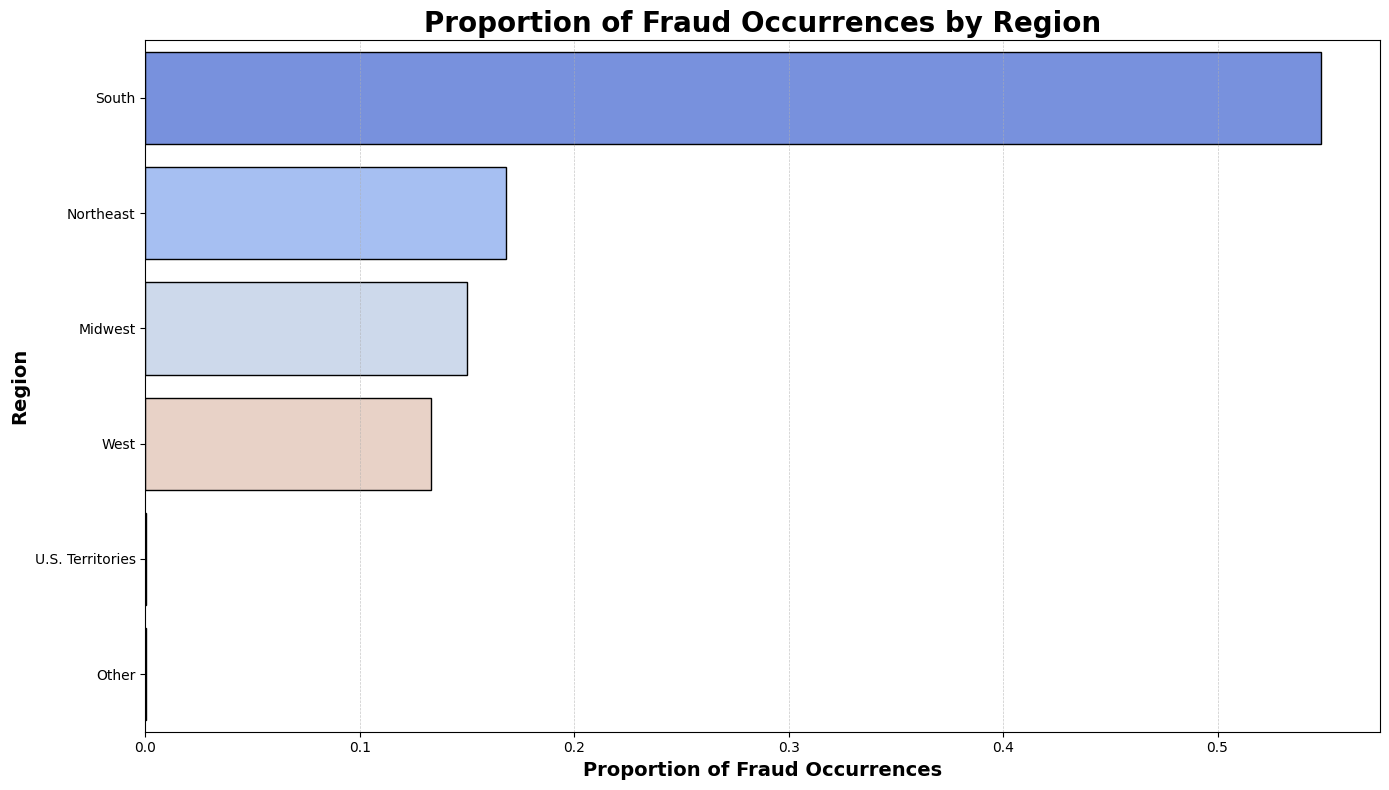

In [14]:
# Calculate the proportion of fraud by region
fraud_by_region = cargo_fraud['region_name'].value_counts(normalize=True).sort_values(ascending=False)

# Plot the proportion of fraud occurrences by region
plt.figure(figsize=(14, 8))
sns.barplot(x=fraud_by_region.values, y=fraud_by_region.index, palette="coolwarm", edgecolor="black")
plt.title("Proportion of Fraud Occurrences by Region", fontsize=20, weight="bold")
plt.xlabel("Proportion of Fraud Occurrences", fontsize=14, weight="bold")
plt.ylabel("Region", fontsize=14, weight="bold")
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


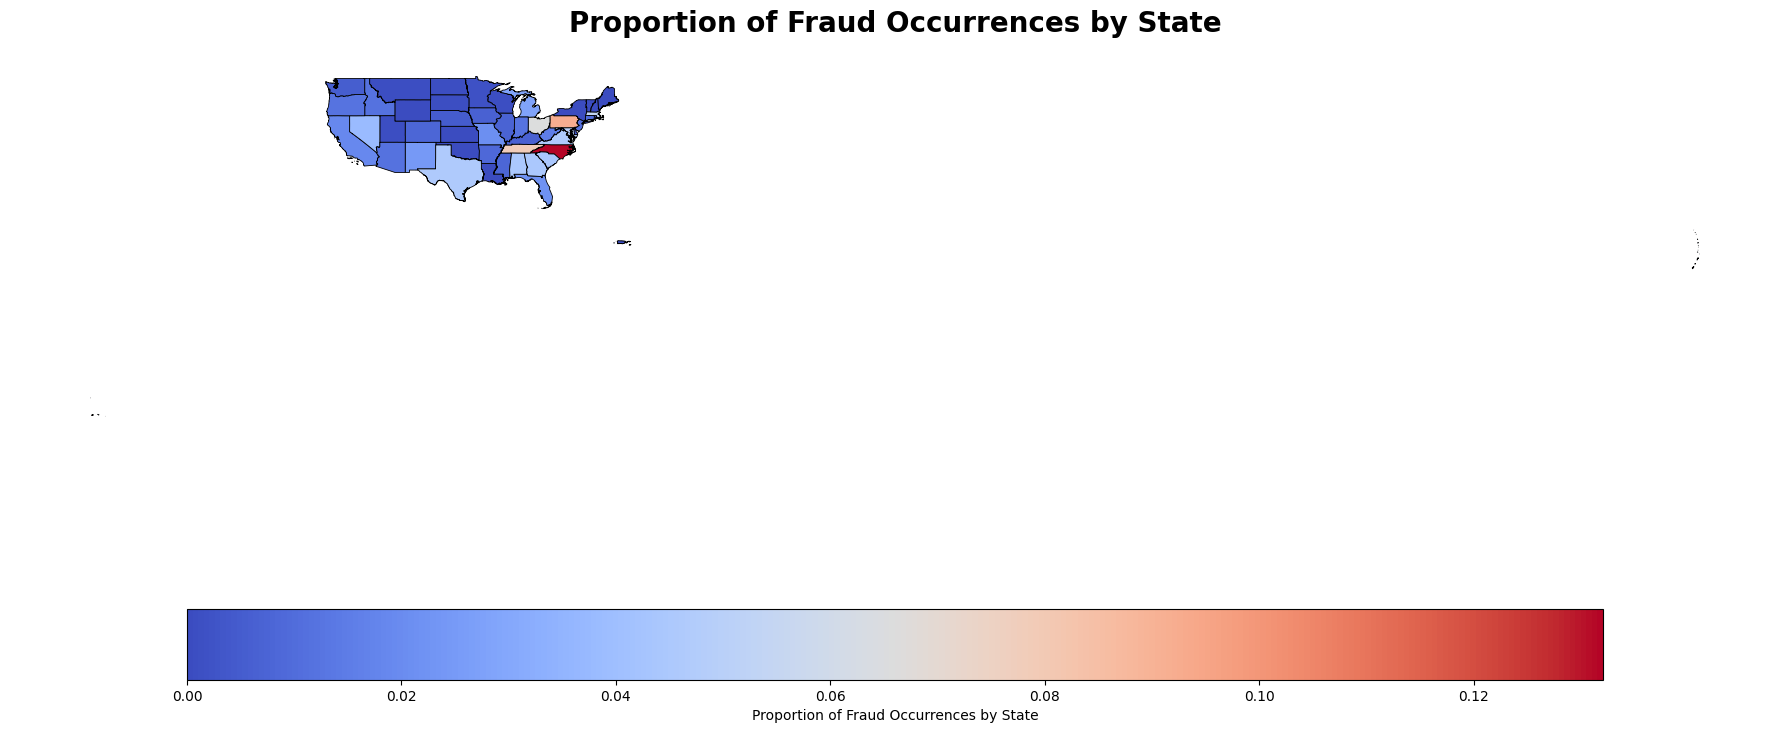

In [19]:
# Calculate the proportion of fraud by state
fraud_by_state = cargo_fraud['state_name'].value_counts(normalize=True).sort_values(ascending=False).reset_index()
fraud_by_state.columns = ['NAME', 'proportion']

# Load USA shapefile
usa = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip')

# Merge the geopandas file and fraud data
merged = usa.merge(fraud_by_state, on='NAME', how='left')
merged['proportion'] = merged['proportion'].fillna(0)

# Exclude Alaska and Hawaii before plotting
merged = merged[~merged['STUSPS'].isin(['AK', 'HI'])]

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(18, 12))
merged.plot(
    column='proportion', cmap='coolwarm', linewidth=0.6,
    ax=ax, edgecolor='black', legend=True,
    legend_kwds={
        'label': "Proportion of Fraud Occurrences by State",
        'orientation': "horizontal",
        'shrink': 0.8
    }
)
ax.set_axis_off()
ax.set_title('Proportion of Fraud Occurrences by State', fontsize=20, weight="bold", pad=20)
plt.tight_layout()
plt.show()


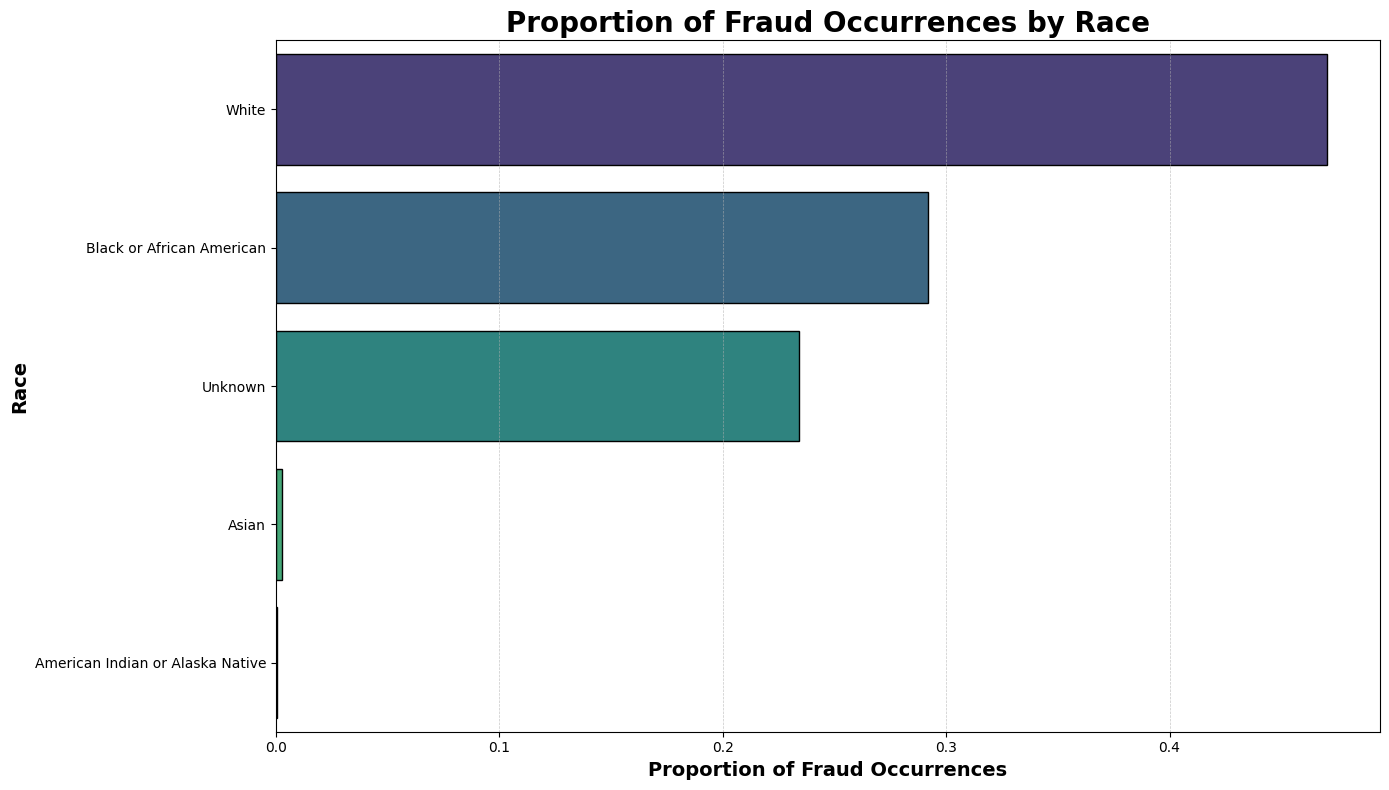

In [16]:
# Calculate the proportion of fraud by race
fraud_by_race = cargo_fraud['offender_race'].value_counts(normalize=True).sort_values(ascending=False)

# Plot the proportion of fraud occurrences by race
plt.figure(figsize=(14, 8))
sns.barplot(x=fraud_by_race.values, y=fraud_by_race.index, palette="viridis", edgecolor="black")
plt.title("Proportion of Fraud Occurrences by Race", fontsize=20, weight="bold")
plt.xlabel("Proportion of Fraud Occurrences", fontsize=14, weight="bold")
plt.ylabel("Race", fontsize=14, weight="bold")
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


Index(['data_year', 'ori', 'pub_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'county_name', 'region_name', 'population_group_code',
       'population_group_desc', 'offense_code', 'offense_name',
       'offender_race', 'offender_ethnicity', 'offender_age', 'offender_sex',
       'victim_type_code', 'victim_type_name', 'location_code',
       'location_name', 'weapon_code', 'weapon_name', 'prop_desc_code',
       'prop_desc_code.1', 'prop_desc_name', 'stolen_value', 'recovered_value',
       'recovered_flag', 'date_recovered', 'Year', 'State'],
      dtype='object')


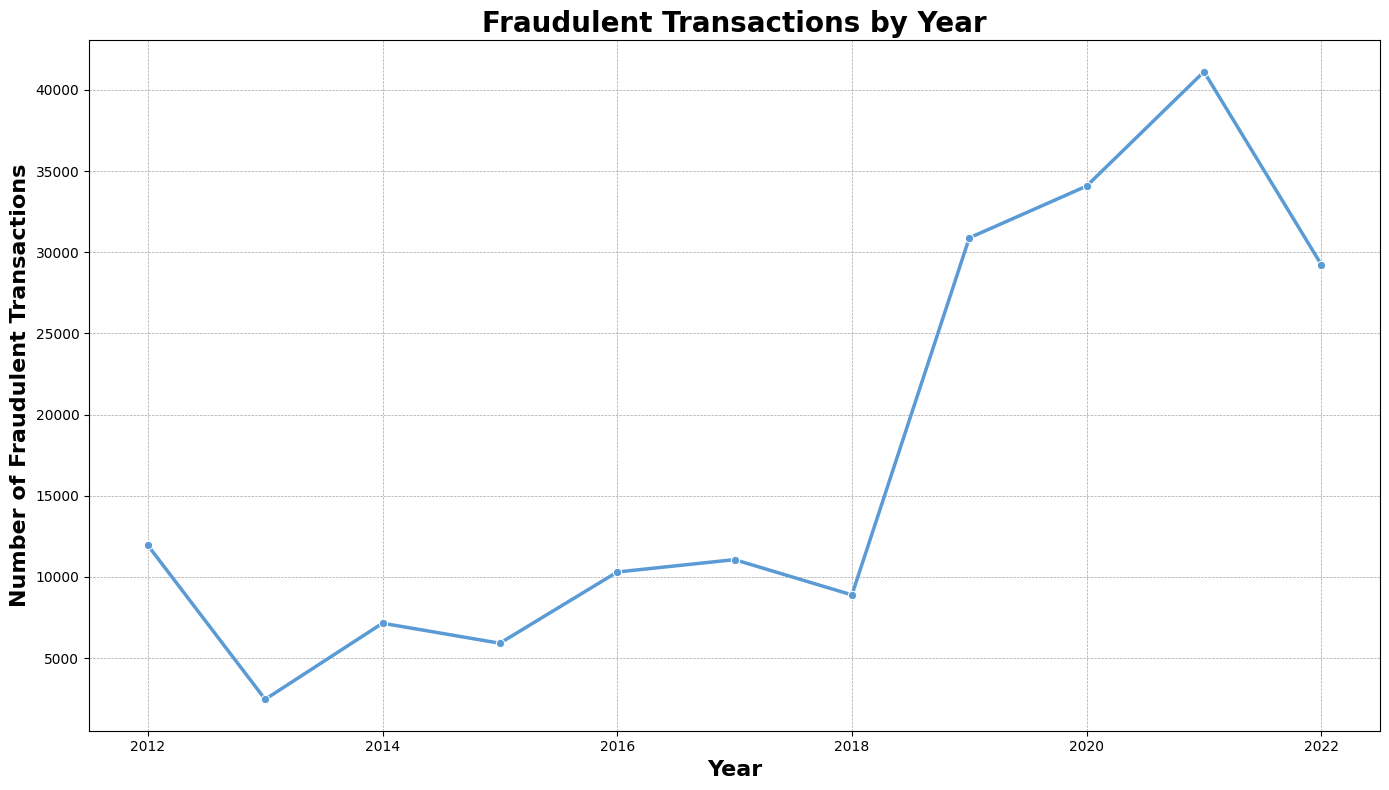

In [ ]:
# Counts by 'Year'
fraud_by_year = cargo_fraud['Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(x=fraud_by_year.index, y=fraud_by_year.values, marker="o", color="#5A9BD5", linewidth=2.5)
plt.title("Fraudulent Transactions by Year", fontsize=20, weight="bold")
plt.xlabel("Year", fontsize=16, weight="bold")
plt.ylabel("Number of Fraudulent Transactions", fontsize=16, weight="bold")
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [30]:
# Merge the unemployment data with cargo fraud data
merged_df = pd.merge(cargo_fraud, state_unemployment, on=['State', 'Year'], how='left')

# Display the merged DataFrame
print(merged_df.head())

   data_year        ori pub_agency_name pub_agency_unit agency_type_name  \
0       2012  FL0160200    Jacksonville             NaN             City   
1       2012  FL0160200    Jacksonville             NaN             City   
2       2012  FL0160200    Jacksonville             NaN             City   
3       2012  FL0160200    Jacksonville             NaN             City   
4       2012  FL0160200    Jacksonville             NaN             City   

  state_abbr state_name   division_name county_name region_name  ...  \
0         FL    Florida  South Atlantic       DUVAL       South  ...   
1         FL    Florida  South Atlantic       DUVAL       South  ...   
2         FL    Florida  South Atlantic       DUVAL       South  ...   
3         FL    Florida  South Atlantic       DUVAL       South  ...   
4         FL    Florida  South Atlantic       DUVAL       South  ...   

  prop_desc_code prop_desc_code.1    prop_desc_name stolen_value  \
0            8.0              8.0  Consuma

In [33]:
# Aggregate the number of fraud cases per state and year
fraud_counts = merged_df.groupby(['State', 'Year']).size().reset_index(name='Fraud_Count')

# Print the first few rows of fraud_counts
print("fraud_counts.head():")
print(fraud_counts.head())


# Merge with state unemployment data
analysis_df = pd.merge(fraud_counts, state_unemployment, on=['State', 'Year'], how='left')

# Print the first few rows of analysis_df
print("\nanalysis_df.head():")
print(analysis_df.head())


# Check for missing values in analysis_df
print("\nMissing values in analysis_df:")
print(analysis_df.isnull().sum())

# Check the number of rows in analysis_df
print(f"\nNumber of rows in analysis_df: {len(analysis_df)}")


# Describe the 'Unemployment_Rate' and 'Fraud_Count' columns
print("\nDescription of 'Unemployment_Rate' and 'Fraud_Count':")
print(analysis_df[['Unemployment_Rate', 'Fraud_Count']].describe())

# Drop rows with missing values in 'Unemployment_Rate' or 'Fraud_Count'
analysis_df_clean = analysis_df.dropna(subset=['Unemployment_Rate', 'Fraud_Count'])

# Check if analysis_df_clean is empty
if analysis_df_clean.empty:
    print("\nNo data available for plotting after dropping missing values.")
else:
    # Plot the relationship between unemployment rate and fraud count
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=analysis_df_clean, x='Unemployment_Rate', y='Fraud_Count')
    plt.title('Fraud Count vs Unemployment Rate', fontsize=16)
    plt.xlabel('Unemployment Rate (%)', fontsize=14)
    plt.ylabel('Fraud Count', fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


fraud_counts.head():
     State  Year  Fraud_Count
0  Alabama  2017           16
1  Alabama  2018           15
2  Alabama  2019           42
3  Alabama  2020          140
4  Alabama  2021         1806

analysis_df.head():
     State  Year  Fraud_Count  Unemployment_Rate
0  Alabama  2017           16                NaN
1  Alabama  2018           15                NaN
2  Alabama  2019           42                NaN
3  Alabama  2020          140                NaN
4  Alabama  2021         1806                NaN

Missing values in analysis_df:
State                  0
Year                   0
Fraud_Count            0
Unemployment_Rate    338
dtype: int64

Number of rows in analysis_df: 338

Description of 'Unemployment_Rate' and 'Fraud_Count':
       Unemployment_Rate   Fraud_Count
count                0.0    338.000000
mean                 NaN    571.147929
std                  NaN   1409.657334
min                  NaN      1.000000
25%                  NaN     13.000000
50%           